In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/sample_data/mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='count', ylabel='class'>

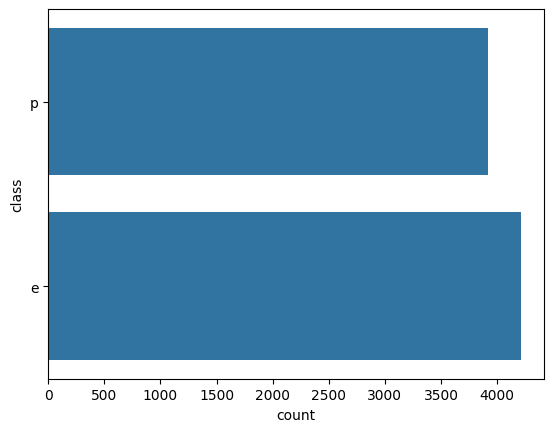

In [5]:
sns.countplot(df['class'])

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


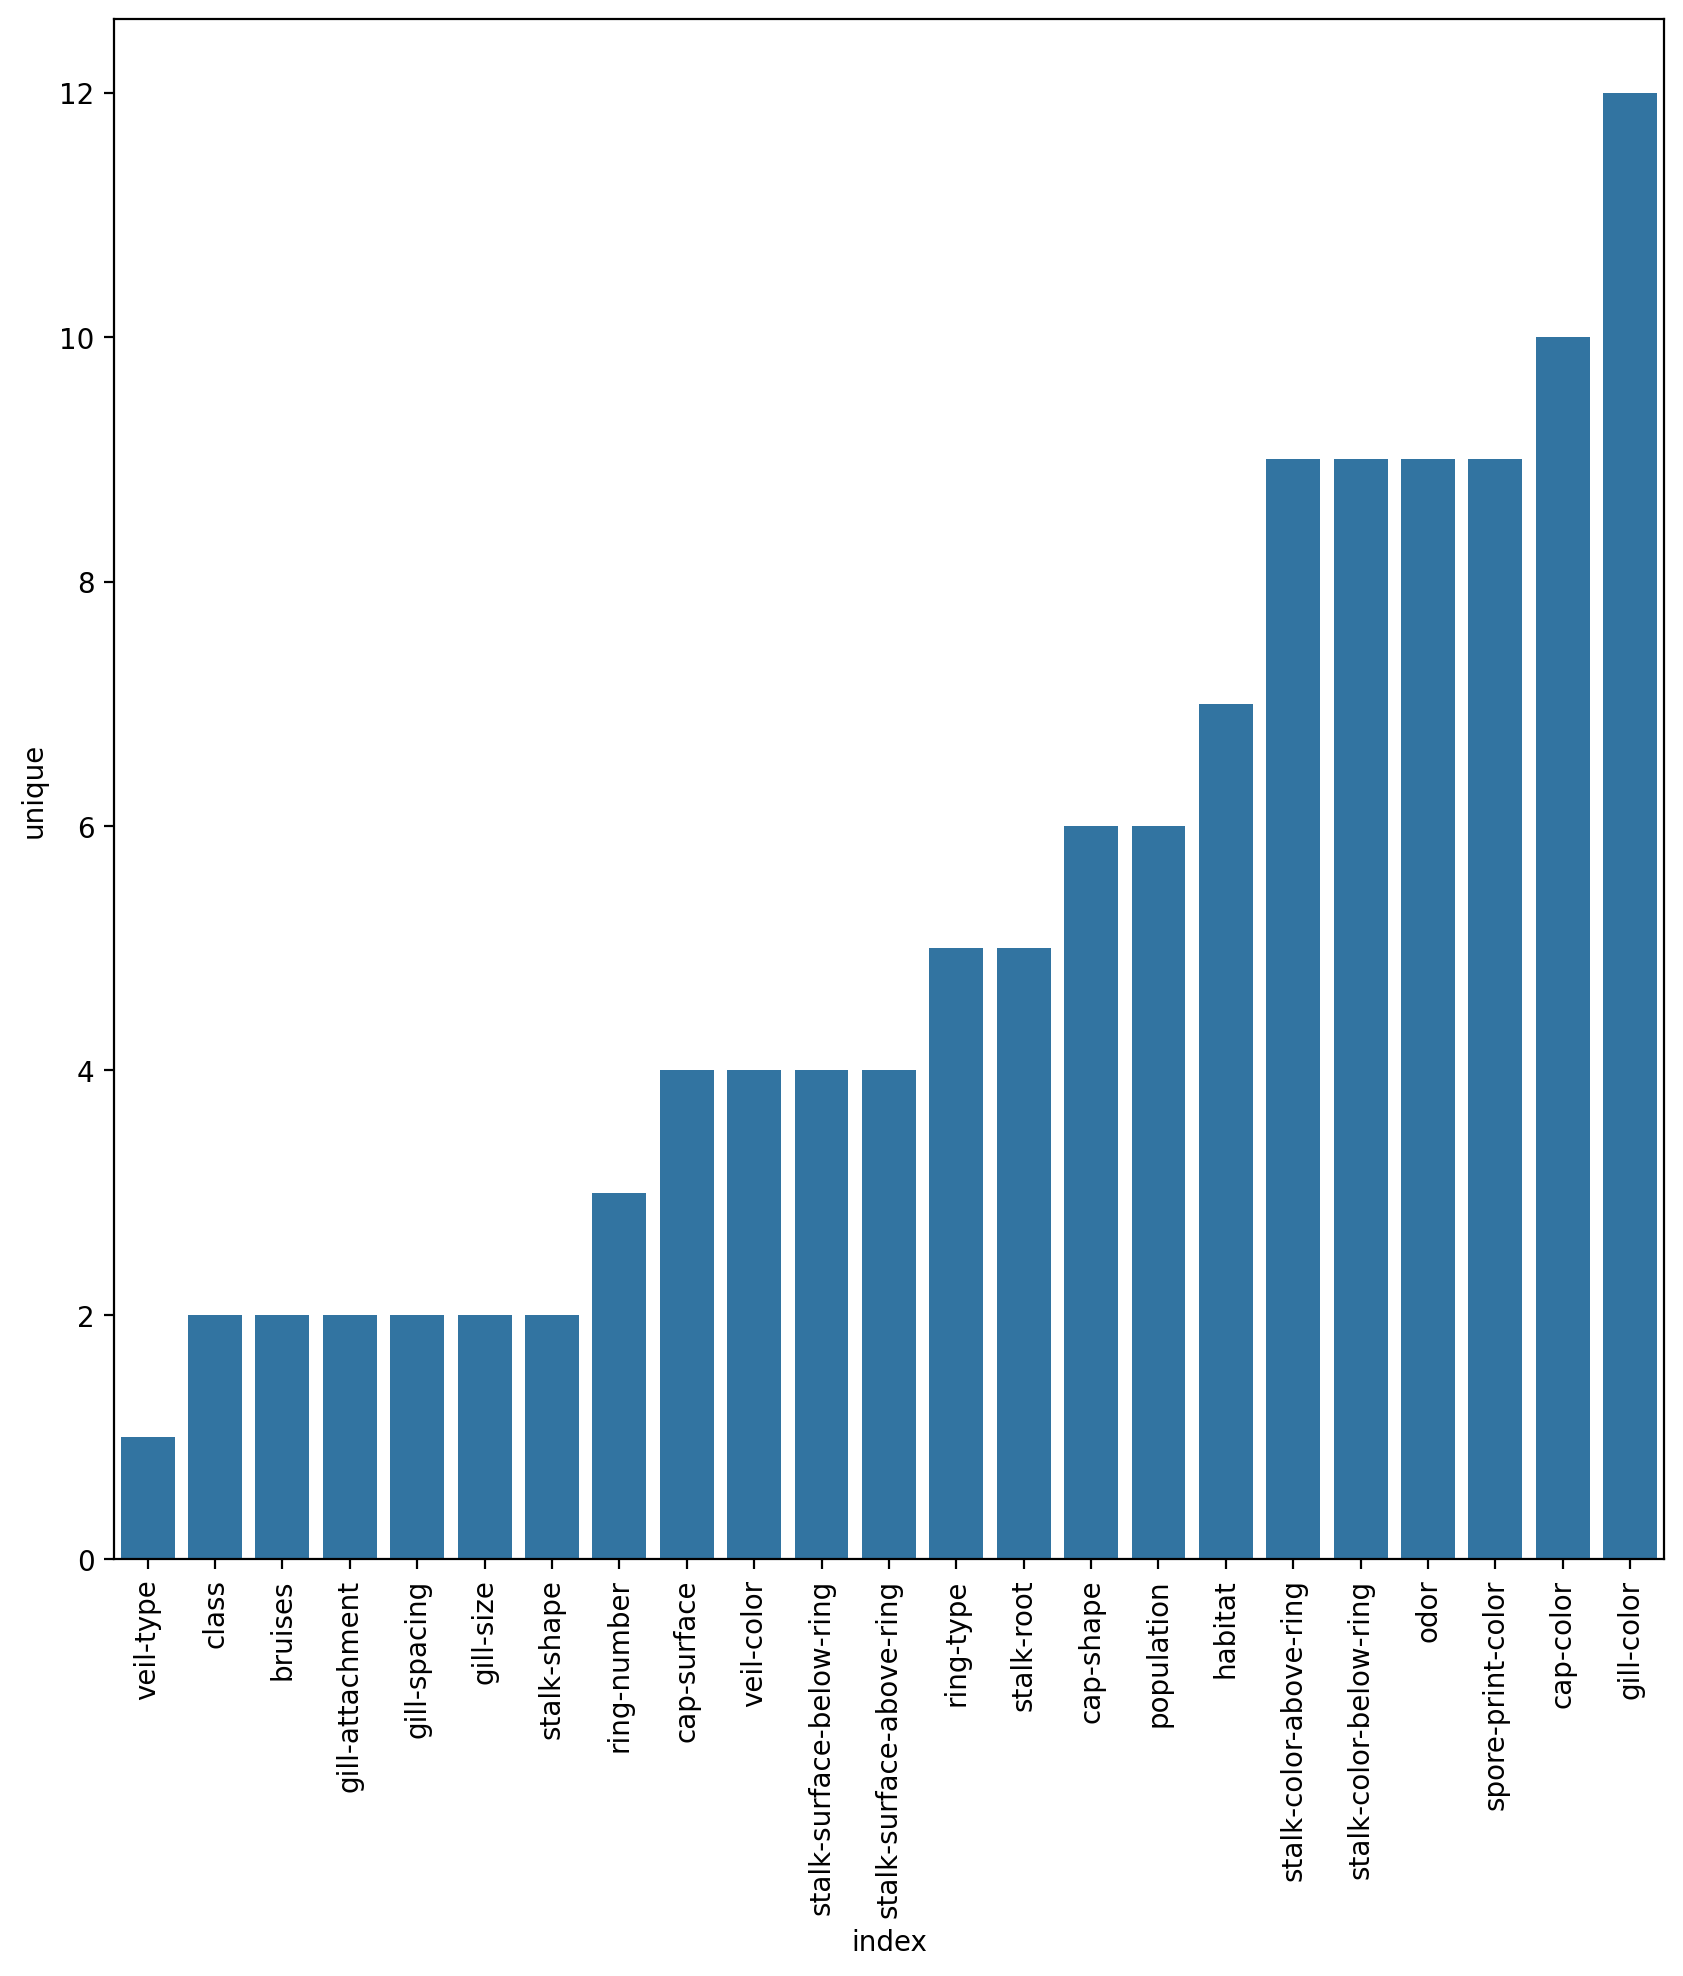

In [11]:
feat_uni = df.describe().transpose().reset_index().sort_values(by='unique')
plt.figure(figsize=(10, 10),dpi=200)

sns.barplot(data=feat_uni, x='index', y='unique')
plt.xticks(rotation=90)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('class', axis=1)
y = df['class']

In [20]:
X.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


In [21]:
X = pd.get_dummies(X,drop_first=True)

In [22]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
model = AdaBoostClassifier(n_estimators=1)

In [27]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
pred = model.predict(X_test)

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [31]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
model.feature_importances_.argmax()

np.int64(22)

In [35]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

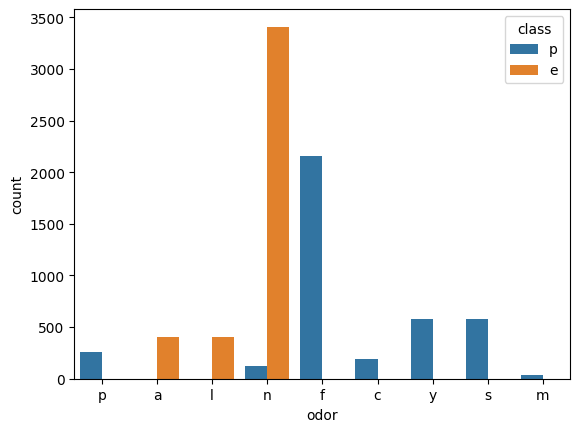

In [37]:
sns.countplot(data = df, x='odor',hue = 'class')

In [38]:
len(X.columns)

95

In [45]:
error_rates = []

for n in range(1,96):
  model = AdaBoostClassifier(n_estimators=n)
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  err = 1-accuracy_score(y_test,pred)

  error_rates.append(err)

Text(0, 0.5, 'Error Rate')

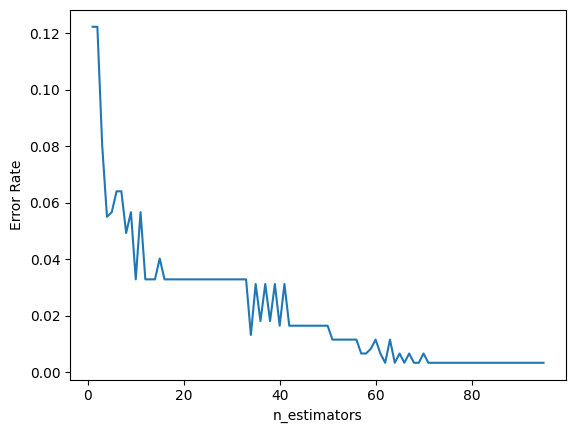

In [46]:
plt.plot(range(1,96),error_rates)
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')


In [47]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [48]:
feats = pd.DataFrame(index=X.columns,
                     data = model.feature_importances_,
                     columns=['Importance'])

In [49]:
imp_feats = feats[feats['Importance']>0]

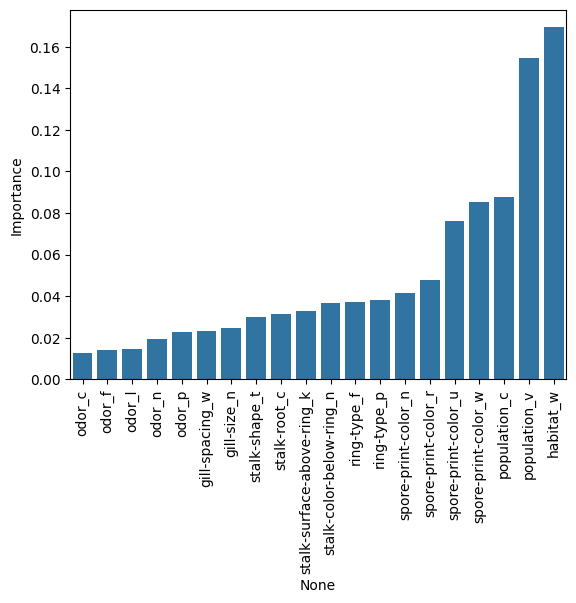

In [51]:
sns.barplot(data=imp_feats.sort_values("Importance"), x=imp_feats.index, y='Importance')
plt.xticks(rotation=90)
plt.show()